In [85]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
import pandas as pd
import json
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from glob import glob
import pathlib

# Organize auto eval results

In [87]:
txt = open("/content/drive/MyDrive/apln552-project/data/"
           "eval_results/auto_eval/classic_lit_all_results.txt").readlines()

In [88]:
txt

['muss_system_outputs/ml_output/classic_lit_complex.txt\n',
 "{'bleu': 40.73, 'sari': 19.467, 'fkgl': 12.36, 'f1_token': 67.875, 'bertscore_precision': 0.58, 'bertscore_recall': 0.732, 'bertscore_f1': 0.655, 'quality_estimation': {'Compression ratio': 1.0, 'Sentence splits': 1.0, 'Levenshtein similarity': 1.0, 'Exact copies': 1.0, 'Additions proportion': 0.0, 'Deletions proportion': 0.0, 'Lexical complexity score': 8.726}}\n",
 'muss_system_outputs/ml_output/classic_lit_simplified_access_default.txt\n',
 "{'bleu': 31.037, 'sari': 36.934, 'fkgl': 7.515, 'f1_token': 59.163, 'bertscore_precision': 0.437, 'bertscore_recall': 0.534, 'bertscore_f1': 0.485, 'quality_estimation': {'Compression ratio': 0.958, 'Sentence splits': 1.377, 'Levenshtein similarity': 0.813, 'Exact copies': 0.0, 'Additions proportion': 0.212, 'Deletions proportion': 0.216, 'Lexical complexity score': 8.182}}\n",
 'muss_system_outputs/ml_output/classic_lit_simplified_access_match_human_params.txt\n',
 "{'bleu': 37.471, 

In [89]:
txt = [line.replace("'", '"') for line in txt]
fns = [line.strip() for line in txt[0:len(txt):2]]
evals = [json.loads(line) for line in txt[1:len(txt):2]]

In [90]:
for ind, eval in enumerate(evals):
  qe = {k:v for k,v in eval['quality_estimation'].items()}
  for k,v in qe.items():
    eval[k] = v
  eval['file'] = fns[ind].split('/')[-1]

In [91]:
df = pd.DataFrame(evals)

In [92]:
df

,bleu,sari,fkgl,f1_token,bertscore_precision,bertscore_recall,bertscore_f1,quality_estimation,Compression ratio,Sentence splits,Levenshtein similarity,Exact copies,Additions proportion,Deletions proportion,Lexical complexity score,file
0,40.730,19.467,12.360,67.875,0.580,0.732,0.655,"{'Compression ratio': 1.0, 'Sentence splits': ...",1.000,1.000,1.000,1.000,0.000,0.000,8.726,classic_lit_complex.txt
1,31.037,36.934,7.515,59.163,0.437,0.534,0.485,"{'Compression ratio': 0.958, 'Sentence splits'...",0.958,1.377,0.813,0.000,0.212,0.216,8.182,classic_lit_simplified_access_default.txt
2,37.471,36.938,7.144,60.658,0.502,0.511,0.506,"{'Compression ratio': 0.77, 'Sentence splits':...",0.770,1.193,0.814,0.013,0.077,0.290,8.478,classic_lit_simplified_access_match_human_para...
3,100.000,100.000,5.576,100.000,1.000,1.000,1.000,"{'Compression ratio': 0.754, 'Sentence splits'...",0.754,1.363,0.721,0.180,0.162,0.380,8.404,classic_lit_simplified_human.txt
4,26.514,43.629,7.450,60.201,0.544,0.606,0.574,"{'Compression ratio': 0.873, 'Sentence splits'...",0.873,1.307,0.698,0.000,0.247,0.345,8.258,classic_lit_simplified_muss_en_mined_default.txt
5,27.512,42.229,6.880,58.877,0.566,0.561,0.563,"{'Compression ratio': 0.74, 'Sentence splits':...",0.740,1.180,0.693,0.000,0.164,0.409,8.551,classic_lit_simplified_muss_en_mined_match_hum...
6,31.812,39.590,7.395,61.834,0.556,0.617,0.586,"{'Compression ratio': 0.889, 'Sentence splits'...",0.889,1.360,0.759,0.000,0.203,0.282,8.638,classic_lit_simplified_muss_en_wikilarge_mined...
7,33.678,41.884,5.495,61.079,0.592,0.579,0.585,"{'Compression ratio': 0.745, 'Sentence splits'...",0.745,1.400,0.730,0.000,0.166,0.382,8.482,classic_lit_simplified_muss_en_wikilarge_mined...


In [93]:
df[['file', 'Levenshtein similarity', 'Sentence splits', 'Exact copies', 'Additions proportion', 'Deletions proportion']] #.sort_values('bertscore_f1', ascending=False)

,file,Levenshtein similarity,Sentence splits,Exact copies,Additions proportion,Deletions proportion
0,classic_lit_complex.txt,1.000,1.000,1.000,0.000,0.000
1,classic_lit_simplified_access_default.txt,0.813,1.377,0.000,0.212,0.216
2,classic_lit_simplified_access_match_human_para...,0.814,1.193,0.013,0.077,0.290
3,classic_lit_simplified_human.txt,0.721,1.363,0.180,0.162,0.380
4,classic_lit_simplified_muss_en_mined_default.txt,0.698,1.307,0.000,0.247,0.345
5,classic_lit_simplified_muss_en_mined_match_hum...,0.693,1.180,0.000,0.164,0.409
6,classic_lit_simplified_muss_en_wikilarge_mined...,0.759,1.360,0.000,0.203,0.282
7,classic_lit_simplified_muss_en_wikilarge_mined...,0.730,1.400,0.000,0.166,0.382


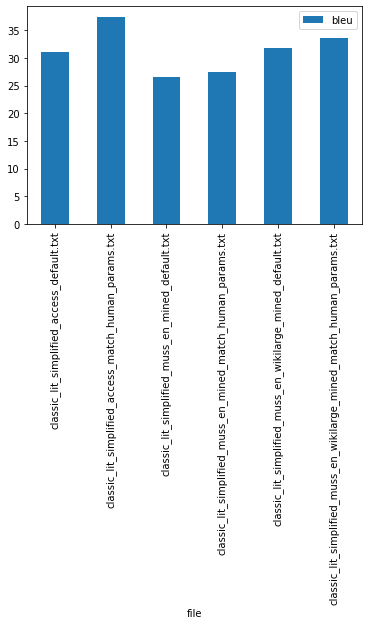

In [94]:
df[df['file'].str.contains('simplified_muss')|df['file'].str.contains('simplified_access')].plot('file', 'bleu', kind='bar')

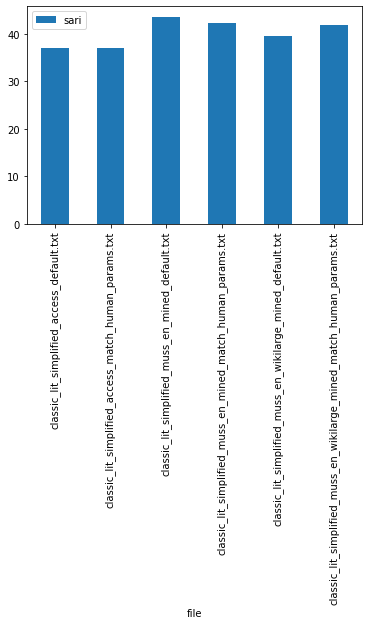

In [95]:
df[df['file'].str.contains('simplified_muss')|df['file'].str.contains('simplified_access')].plot('file', 'sari', kind='bar')

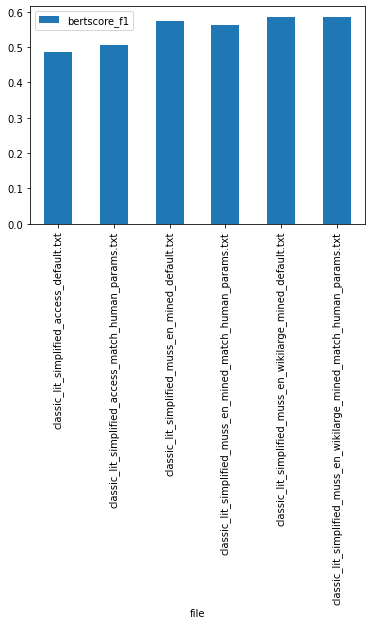

In [96]:
df[df['file'].str.contains('simplified_muss')|df['file'].str.contains('simplified_access')].plot('file', 'bertscore_f1', kind='bar')

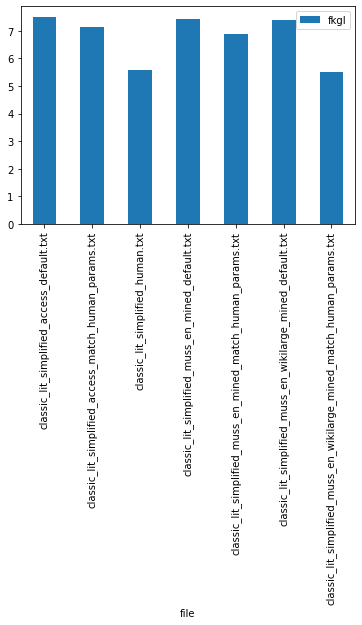

In [97]:
df[df['file'].str.contains('simplified')].plot('file', 'fkgl', kind='bar')

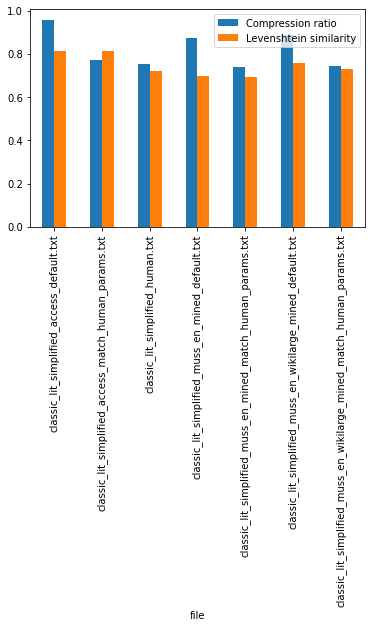

In [98]:
df[df['file'].str.contains('simplified')].plot('file', ['Compression ratio', 
                                                        'Levenshtein similarity'], kind='bar')

In [99]:
'''
simp = df[df['file'].str.contains('simplified')]

fig, ax = plt.subplots(2, 3, sharey=True, figsize=(15,15))
ax[0,0].barh(simp['file'], simp['Compression ratio'])
ax[0,1].barh(simp['file'], simp['Sentence splits'])
ax[0,2].barh(simp['file'], simp['Levenshtein similarity'])
ax[1,0].barh(simp['file'], simp['Lexical complexity score'])
ax[1,1].barh(simp['file'], simp['Additions proportion'])
ax[1,2].barh(simp['file'], simp['Deletions proportion'])
'''

"\nsimp = df[df['file'].str.contains('simplified')]\n\nfig, ax = plt.subplots(2, 3, sharey=True, figsize=(15,15))\nax[0,0].barh(simp['file'], simp['Compression ratio'])\nax[0,1].barh(simp['file'], simp['Sentence splits'])\nax[0,2].barh(simp['file'], simp['Levenshtein similarity'])\nax[1,0].barh(simp['file'], simp['Lexical complexity score'])\nax[1,1].barh(simp['file'], simp['Additions proportion'])\nax[1,2].barh(simp['file'], simp['Deletions proportion'])\n"

In [100]:
! ls drive/MyDrive/apln552-project/data

eval_results  old  raw_data


Cosine similarity for assessing semantic continuity across simplification:

In [101]:
# !pip install sentence_transformers
from sentence_transformers import SentenceTransformer, util
from tabulate import tabulate

model = SentenceTransformer('all-MiniLM-L6-v2')

def all_similarities(sent_embeddings):
    """Tabulate a list of all cosine similarity scores.""" # Just for a demo
    sims = []
    for i in range(len(sent_embeddings)):
        for j in range(i+1, len(sent_embeddings)):
            sim = util.cos_sim(sent_embeddings[i], sent_embeddings[j]).item()
            sims.append([i, j, round(sim,4)])
    print(tabulate(sims, headers=['SentA', 'SentB', 'Similarity']))

def cos_similarity(sent1, sent2):
    """Calculate cosine similarity of two sentences."""
    encoded_sents = model.encode([sent1, sent2])
    cos = util.cos_sim(*encoded_sents)
    return round(cos.item(), 3)

basic_sentences = [
    'I like to eat when I travel',
    'I like walking when I travel'
    ]

trick_sentences = [
    'I absolutely love eating when I travel to new places',
    'I like to walk',
    'I absolutely love walking when I travel to new places'
    ]

# Demo
print("Basic function:")
all_similarities(model.encode(basic_sentences))
print("\nTrick sentences:")
all_similarities(model.encode(trick_sentences))

Basic function:
  SentA    SentB    Similarity
-------  -------  ------------
      0        1        0.6286

Trick sentences:
  SentA    SentB    Similarity
-------  -------  ------------
      0        1        0.3643
      0        2        0.6441
      1        2        0.6705


In [102]:
sents = ["By this curious turn of disposition I have gained the reputation of deliberate heartlessness; how undeserved, I alone can appreciate.",
         "By this turn of disposition I have gained the reputation of deliberate heartlessness ."
        ]
        
print(cos_similarity(sents[0],sents[1]))

0.908


# Make manual eval files

In [103]:
result_dir = glob('drive/MyDrive/apln552-project/data/raw_data/*simplified*.txt')
complex_path = 'drive/MyDrive/apln552-project/data/raw_data/classic_lit_complex.txt'

In [104]:
dfs = []
for i, f in enumerate(result_dir):
    version = pathlib.PurePath(f).stem.replace('classic_lit_', '')
    sents = [line.strip() for line in open(f).readlines()]
    sent_version = []
    for ind, sent in enumerate(sents):
        sent_version.append(version + str(ind))
    dfs.append(pd.DataFrame({version: sents}))

In [105]:
anno_df = pd.concat(dfs, axis=1).sample(n=30, random_state=1)
complex_df = pd.DataFrame({'complex': [line.strip() 
                            for line in open(complex_path).readlines()]}).sample(n=30, 
                                                                                 random_state=1)

In [106]:
anno_df.head(2)

,simplified_human,simplified_muss_en_wikilarge_mined_default,simplified_muss_en_mined_default,simplified_access_match_human_params,simplified_muss_en_wikilarge_mined_match_human_params,simplified_muss_en_mined_match_human_params,simplified_access_default
14,In the evening the same room was more stifling...,In the evening the same room was more stifling...,In the evening the same room was warm and brig...,In the evening the same room was brilliant wit...,"In the evening the same room was more heated, ...",In the evening the same room was warmly heated...,In the evening the same room was more brillian...
98,His many thin legs moved around helplessly as ...,"His many legs were very thin, compared to his ...","His many legs, which were significantly smalle...","His many legs , pitifully , compared with the ...",His many legs were very thin. They waved about...,"His many thin legs, smaller than his body size...","His many legs , called pitifully compared with..."


In [107]:
ml = anno_df[0:10]
bw = anno_df[10:20]
both = anno_df[20:30]

In [108]:
import nltk
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk import word_tokenize
detokenizer = TreebankWordDetokenizer()

In [109]:
def make_final(per_anno_df):
   combined_df = pd.concat([per_anno_df,both]).stack().reset_index().sample(frac=1.0)
   new_df = combined_df.merge(complex_df, how='left', left_on='level_0', right_index=True)
   new_df.columns = ['sent_id', 'model', 'simplified', 'complex']
   new_df = new_df[['sent_id', 'model', 'complex', 'simplified']]
   new_df['simplified'] = new_df['simplified'].str.replace(r" ([\.,\?\!\'])", r"\1", regex=True)

   return new_df

In [110]:
ml_final = make_final(ml)
bw_final = make_final(bw)

In [111]:
ml_final.to_csv('drive/MyDrive/apln552-project/data/eval_results/manual_eval/ml_anno.csv')
bw_final.to_csv('drive/MyDrive/apln552-project/data/eval_results/manual_eval/bw_anno.csv')

In [112]:
ml_final['simplified'].to_list()

['"How do you get to West Egg?" he asked, not understanding.',
 'By blood she was connected with big people. Some very big people indeed, people who belonged to the Upper Ten Hundred, but of these very big people she knew and saw little, and they did not care much for her.',
 'He had always wanted to visit him. However, to the last always assuring his wife that he should not go ; and till the evening after the visit was paid.',
 'It was only on the consideration of Moore being a sort of outcast and alien, and having but half measure of British blood to temper the foreign gall which corroded his veins, that he brought himself to listen, even though he wanted to slap the man who was speaking.',
 'His many legs, called pitifully compared with the size of the rest of him, about helplessly as he looked.',
 'The studio was filled with the smell of roses. When the light summer wind blew through the garden, the scent of roses would come through the open door.',
 'At friendly meetings, and when

# Manual eval summary/correlation

In [214]:
ml = pd.read_csv('/content/drive/MyDrive/apln552-project/data/eval_results/manual_eval/APLN 552 Manual evaluation - Melissa.csv')
bw = pd.read_csv('/content/drive/MyDrive/apln552-project/data/eval_results/manual_eval/APLN 552 Manual evaluation - Brandon.csv')

In [215]:
merged = ml.merge(bw, on=['sent_id', 'model', 'complex', 'simplified'], how='outer')
merged = merged[['sent_id', 'model', 'complex', 'simplified',
               'Grammaticality_x', 'Grammaticality_y',
               'Simplicity_x', 'Simplicity_y',
               'Adequacy_x', 'Adequacy_y']]
merged.head()

,sent_id,model,complex,simplified,Grammaticality_x,Grammaticality_y,Simplicity_x,Simplicity_y,Adequacy_x,Adequacy_y
0,33,simplified_human,It was only on the consideration of Moore bein...,It was only because Moore was a sort of half-B...,4.0,4.0,3.0,4.0,3.0,4.0
1,125,simplified_access_match_human_params,There only remain a hundred and twenty thousan...,There only remain a hundred and twenty thousan...,4.0,4.0,2.0,1.0,2.0,2.0
2,84,simplified_muss_en_mined_default,"""How do you get to West Egg village?"" he asked...","""How do you get to West Egg?"" he asked, not un...",4.0,4.0,0.0,1.0,1.0,2.0
3,141,simplified_muss_en_wikilarge_mined_match_human...,"So, I called myself Pip, and came to be called...",So I started calling myself Pip.,3.0,NaN,4.0,NaN,3.0,NaN
4,40,simplified_muss_en_mined_match_human_params,"By blood she was connected with big people,—di...","By blood she was related to the great people, ...",3.0,4.0,3.0,3.0,4.0,4.0


In [216]:
merged.groupby('model').mean()

,sent_id,Grammaticality_x,Grammaticality_y,Simplicity_x,Simplicity_y,Adequacy_x,Adequacy_y
model,,,,,,,
simplified_access_default,70.2,2.25,1.85,1.15,0.85,1.80,2.50
simplified_access_match_human_params,70.2,2.15,2.40,1.40,1.95,1.70,2.55
simplified_human,70.2,3.90,4.00,2.70,3.10,3.70,3.85
simplified_muss_en_mined_default,70.2,3.40,3.70,1.90,2.85,2.95,3.20
simplified_muss_en_mined_match_human_params,70.2,3.60,3.70,2.50,3.05,3.15,3.10
simplified_muss_en_wikilarge_mined_default,70.2,3.70,3.85,1.75,2.25,3.55,3.35
simplified_muss_en_wikilarge_mined_match_human_params,70.2,3.65,3.95,2.90,3.50,3.00,3.55


In [217]:
merged.corr()

,sent_id,Grammaticality_x,Grammaticality_y,Simplicity_x,Simplicity_y,Adequacy_x,Adequacy_y
sent_id,1.000000,0.010293,0.040940,0.151430,0.068410,0.054964,-0.041191
Grammaticality_x,0.010293,1.000000,0.747115,0.422677,0.483882,0.533253,0.462799
Grammaticality_y,0.040940,0.747115,1.000000,0.423498,0.470394,0.614129,0.470442
Simplicity_x,0.151430,0.422677,0.423498,1.000000,0.758105,0.314831,0.353036
Simplicity_y,0.068410,0.483882,0.470394,0.758105,1.000000,0.427566,0.275999
Adequacy_x,0.054964,0.533253,0.614129,0.314831,0.427566,1.000000,0.669855
Adequacy_y,-0.041191,0.462799,0.470442,0.353036,0.275999,0.669855,1.000000


In [218]:
from sklearn import metrics

In [219]:
double = merged.dropna()

In [220]:
print(metrics.confusion_matrix(double['Grammaticality_x'], double['Grammaticality_y']))
metrics.cohen_kappa_score(double['Grammaticality_x'], double['Grammaticality_y'], weights='quadratic')

[[ 1  0  1  1  0]
 [ 0  2  1  0  0]
 [ 2  3  1  1  0]
 [ 0  0  1  2  5]
 [ 0  1  0  5 43]]


0.7448090030115708

In [221]:
print(metrics.confusion_matrix(double['Simplicity_x'], double['Simplicity_y']))
metrics.cohen_kappa_score(double['Simplicity_x'], double['Simplicity_y'], weights='quadratic')

[[ 8  3  1  1  0]
 [ 2  3  6  1  2]
 [ 0  4  1  3  4]
 [ 0  0  4  7  4]
 [ 0  0  0  2 14]]


0.7354320160750167

In [222]:
print(metrics.confusion_matrix(double['Adequacy_x'], double['Adequacy_y']))
metrics.cohen_kappa_score(double['Adequacy_x'], double['Adequacy_y'], weights='quadratic')

[[ 0  1  1  0  0]
 [ 1  2  1  1  1]
 [ 1  2  7  6  3]
 [ 0  0  1  4  9]
 [ 0  0  1  4 24]]


0.6522435897435896

In [223]:
concatenated = pd.concat([ml, bw])
concatenated.head()

,Unnamed: 0,sent_id,model,complex,simplified,Grammaticality,Simplicity,Adequacy,Error notes,Grammaticality\n0 = garbled nonsense\n1 = hard to understand but not complete nonsense\n2 = at least one major grammatical error\n3 = awkward/minor error (maybe a comma error)\n4 = completely grammatical,"Simplicity\n0 = same or worse than orig\n1 = minor change (maybe one slightly simpler word)\n2 = a few minor changes\n3 = simpler but clear opportunities for simplification missed\n4 = major revision (sentence splitting, simpler vocabulary)",Adequacy\n0 = meaning not retained\n1 = major meaning change but some original info retained\n2 = major info changed but keeps most of the original meaning\n3 = minor changes in meaning\n4 = sufficiently similar (can have minor changes to detail if appropriate)
0,113,33,simplified_human,It was only on the consideration of Moore bein...,It was only because Moore was a sort of half-B...,4,3,3,NaN,NaN,NaN,NaN
1,103,125,simplified_access_match_human_params,There only remain a hundred and twenty thousan...,There only remain a hundred and twenty thousan...,4,2,2,NaN,NaN,NaN,NaN
2,81,84,simplified_muss_en_mined_default,"""How do you get to West Egg village?"" he asked...","""How do you get to West Egg?"" he asked, not un...",4,0,1,meaning changed,NaN,NaN,NaN
3,45,141,simplified_muss_en_wikilarge_mined_match_human...,"So, I called myself Pip, and came to be called...",So I started calling myself Pip.,3,4,3,important info lost,NaN,NaN,NaN
4,93,40,simplified_muss_en_mined_match_human_params,"By blood she was connected with big people,—di...","By blood she was related to the great people, ...",3,3,4,NaN,NaN,NaN,NaN


In [224]:
concatenated.groupby('model')['Error notes'].value_counts()

model                                                  Error notes                                  
simplified_access_default                              nonsensical                                      6
                                                       more complex than/same complexity as original    4
                                                       ungrammatical                                    4
                                                       meaning changed                                  2
                                                       new info added                                   2
simplified_access_match_human_params                   important info lost                              6
                                                       ungrammatical                                    4
                                                       identical                                        2
                                                   

In [225]:
human_means = concatenated.groupby('model').mean().reset_index()[['model', 'Grammaticality', 'Simplicity', 'Adequacy']]

In [226]:
human_means.sort_values('Simplicity')

,model,Grammaticality,Simplicity,Adequacy
0,simplified_access_default,2.050,1.000,2.150
1,simplified_access_match_human_params,2.275,1.675,2.125
5,simplified_muss_en_wikilarge_mined_default,3.775,2.000,3.450
3,simplified_muss_en_mined_default,3.550,2.375,3.075
4,simplified_muss_en_mined_match_human_params,3.650,2.775,3.125
2,simplified_human,3.950,2.900,3.775
6,simplified_muss_en_wikilarge_mined_match_human...,3.800,3.200,3.275


In [227]:
concatenated = pd.concat([ml, bw])
concatenated['control'] = concatenated['model'].apply(lambda x: x.replace('match_human_params', 'matchhuman').replace("_human", "_human_matchhuman").split("_")[-1])
concatenated['model'] = concatenated['model'].apply(lambda x: "_".join(x.replace('match_human_params', 'matchhuman').replace("_human", "_human_matchhuman").split("_")[:-1]))

In [228]:
concatenated.groupby('model')['Grammaticality'].mean().sort_values(ascending=False)

model
simplified_human                      3.9500
simplified_muss_en_wikilarge_mined    3.7875
simplified_muss_en_mined              3.6000
simplified_access                     2.1625
Name: Grammaticality, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'simplified_access'),
 Text(0, 0, 'simplified_human'),
 Text(0, 0, 'simplified_muss_en_mined'),
 Text(0, 0, 'simplified_muss_en_wikilarge_mined')]

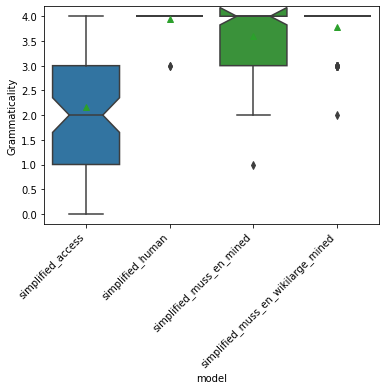

In [229]:
plt = sns.boxplot('model', 'Grammaticality', 
                  data=concatenated, 
                  notch=True, showmeans=True,
                  order=sorted(concatenated['model'].unique()))
plt.set_xticklabels(plt.get_xticklabels(), 
                    rotation=45, 
                    horizontalalignment='right')

In [230]:
concatenated.groupby('model')['Simplicity'].mean().sort_values(ascending=False)

model
simplified_human                      2.9000
simplified_muss_en_wikilarge_mined    2.6000
simplified_muss_en_mined              2.5750
simplified_access                     1.3375
Name: Simplicity, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'simplified_access'),
 Text(0, 0, 'simplified_human'),
 Text(0, 0, 'simplified_muss_en_mined'),
 Text(0, 0, 'simplified_muss_en_wikilarge_mined')]

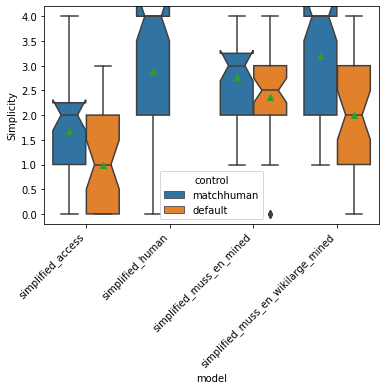

In [231]:
plt = sns.boxplot('model', 'Simplicity', 
                  data=concatenated, hue='control',
                  notch=True, showmeans=True,
                  order=sorted(concatenated['model'].unique()))
plt.set_xticklabels(plt.get_xticklabels(), 
                    rotation=45, 
                    horizontalalignment='right')

In [232]:
concatenated.groupby('model')['Adequacy'].mean().sort_values(ascending=False)

model
simplified_human                      3.7750
simplified_muss_en_wikilarge_mined    3.3625
simplified_muss_en_mined              3.1000
simplified_access                     2.1375
Name: Adequacy, dtype: float64

In [233]:
humanvbest = concatenated[concatenated['model'].isin(['simplified_human', 'simplified_muss_en_wikilarge_mined'])]
hvb_all = pd.melt(humanvbest, id_vars=['model', 'control'], value_vars=['Grammaticality', 'Simplicity', 'Adequacy'])

In [236]:
all = pd.melt(concatenated, id_vars=['model', 'control'], 
              value_vars=['Grammaticality', 'Simplicity', 'Adequacy'])
all = all[all['control']=='matchhuman']
all = all.replace({'simplified_human': 'Human', 
                   'simplified_muss_en_wikilarge_mined':'MUSS+',
                   'simplified_muss_en_mined': 'MUSS',
                   'simplified_access': 'ACCESS',
                   'Grammaticality':'Fluency'})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


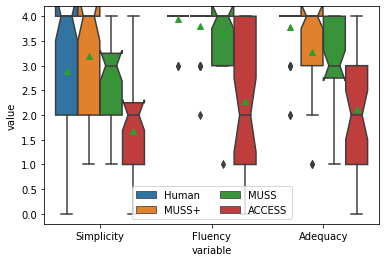

In [237]:
plt = sns.boxplot('variable', 'value', 
                  data=all, hue='model',
                  hue_order=['Human', 'MUSS+', 'MUSS', 'ACCESS'], 
                  notch=True, showmeans=True,
                  order=['Simplicity', 'Fluency', 'Adequacy'])
#plt.set_xticklabels(plt.get_xticklabels(), 
#                    rotation=45, 
#                    horizontalalignment='right')
plt.legend(loc='lower center', ncol=2)
#plt.set_title('Human Ratings of Simplified Sentences')

In [ ]:
concatenated.groupby('model')[['Grammaticality', 'Simplicity', 'Adequacy']].describe()

In [ ]:
df['file'] = df['file'].apply(lambda x: x.replace('.txt', '').replace('classic_lit_', ''))

In [ ]:
all_metrics = df.merge(human_means, left_on='file', right_on='model')

In [ ]:
all_metrics.corr()

In [ ]:
import matplotlib.pyplot as plt

cmap=sns.diverging_palette(240, 10, as_cmap=True)
fig, ax = plt.subplots(figsize=(9,1))
sns.heatmap(all_metrics.corr()[-3:], vmin=-1, vmax=1, cmap=cmap, ax=ax)

# Sent level analysis

In [140]:
sent_metrics = glob("/content/drive/MyDrive/apln552-project/data/eval_results/auto_eval/sent*.csv")

In [141]:
sent_met_dict = {}
for f in sent_metrics:
    metric = f.split("/")[-1].replace(".csv", "").replace("sent_level_", "")
    sent_met_dict[metric] = pd.read_csv(f)

In [142]:
sent_met_dict['bleu'].columns

Index(['Unnamed: 0', 'sentence', 'classic_lit_simplified_human.txt',
       'classic_lit_simplified_muss_en_wikilarge_mined_default.txt',
       'classic_lit_simplified_muss_en_mined_default.txt',
       'classic_lit_simplified_access_match_human_params.txt',
       'classic_lit_simplified_muss_en_wikilarge_mined_match_human_params.txt',
       'classic_lit_simplified_muss_en_mined_match_human_params.txt',
       'classic_lit_simplified_access_default.txt'],
      dtype='object')

In [143]:
hum_rating = pd.concat([ml, bw]).groupby(['model', 'sent_id', 'complex', 'simplified']).mean()[['Grammaticality', 'Simplicity', 'Adequacy']].reset_index()

In [144]:
hum_rating

,model,sent_id,complex,simplified,Grammaticality,Simplicity,Adequacy
0,simplified_access_default,5,"By the end of eleven years, however, Mrs. Pric...","In the end of eleven years, Mrs. Price could n...",1.0,1.0,4.0
1,simplified_access_default,14,In the evening the same room was more stifling...,In the evening the same room was more brillian...,2.0,2.0,2.0
2,simplified_access_default,16,"Believe me, good folks, this is not so inconsi...","Believe me, good folks are not so good. This i...",4.0,2.0,0.0
3,simplified_access_default,19,"I maintain this to be a dedication, notwithsta...","Because of this it is a dedication, it does no...",1.5,0.0,2.0
4,simplified_access_default,29,"Here was she disturbed and unhappy, because he...","Here was she disturbed and unhappy, because he...",2.0,0.0,4.0
...,...,...,...,...,...,...,...
205,simplified_muss_en_wikilarge_mined_match_human...,120,"It is a melancholy object to those, who walk t...",It is a melancholy object to those who walk th...,4.0,1.0,3.0
206,simplified_muss_en_wikilarge_mined_match_human...,125,There only remain a hundred and twenty thousan...,A hundred and twenty thousand poor children ar...,4.0,4.0,4.0
207,simplified_muss_en_wikilarge_mined_match_human...,131,"At friendly meetings, and when the wine was to...","At friendly meetings, and when the wine was to...",3.0,2.0,4.0
208,simplified_muss_en_wikilarge_mined_match_human...,141,"So, I called myself Pip, and came to be called...",So I started calling myself Pip.,3.0,4.0,3.0


In [145]:
models = hum_rating['model'].unique()
human_dict = {}
for mod in models:
    human_dict[mod] = hum_rating[hum_rating['model']==mod]

In [146]:
# human_dict[mod].merge(sent_met_dict['bleu'], left_on='sent_id', right_index=True)

In [147]:
mets_df = pd.DataFrame()
for k in sent_met_dict.keys():
    met_df = pd.melt(sent_met_dict[k], id_vars=['Unnamed: 0', 'sentence'], var_name='model', value_name=k)
    met_df = met_df.rename(columns={'Unnamed: 0': 'sent_id'})
    met_df['model'] = met_df['model'].str.replace('.txt', '').str.replace('classic_lit_', '')
    if len(mets_df):
        mets_df = mets_df.merge(met_df, on=['sent_id', 'sentence', 'model'])
    else:
        mets_df = met_df.copy()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


In [148]:
mets_df.groupby('model').mean()['cos_sim'].sort_values(ascending=False)

model
simplified_human                                         1.000000
simplified_muss_en_mined_default                         0.802387
simplified_muss_en_wikilarge_mined_default               0.802087
simplified_muss_en_wikilarge_mined_match_human_params    0.797627
simplified_muss_en_mined_match_human_params              0.786227
simplified_access_default                                0.763793
simplified_access_match_human_params                     0.752813
Name: cos_sim, dtype: float64

In [149]:
mets_df_merged = mets_df.merge(hum_rating[~hum_rating['model'].str.contains('simplified_human')], on=['model', 'sent_id'])

In [150]:
mets_df_merged

,sent_id,sentence,model,bleu,sari,fkgl,bertscore_p,bertscore_r,bertscore_f,f1_token,...,lev_sim,exact,adds,dels,lex_comp,complex,simplified,Grammaticality,Simplicity,Adequacy
0,5,"By the end of eleven years, however, Mrs. Pric...",simplified_muss_en_wikilarge_mined_default,63.257,25.868,11.225,0.837757,0.806847,0.822549,74.783,...,0.840,False,0.212,0.212,8.226,"By the end of eleven years, however, Mrs. Pric...","By the end of eleven years, however, Mrs. Pric...",3.0,3.0,4.0
1,14,In the evening the same room was more stifling...,simplified_muss_en_wikilarge_mined_default,33.754,17.259,4.420,0.601398,0.417541,0.508713,74.830,...,0.697,False,0.265,0.382,9.126,In the evening the same room was more stifling...,In the evening the same room was more stifling...,4.0,1.0,2.0
2,16,"Believe me, good folks, this is not so inconsi...",simplified_muss_en_wikilarge_mined_default,35.280,18.220,3.534,0.827683,0.683619,0.755134,74.669,...,0.744,False,0.143,0.333,7.772,"Believe me, good folks, this is not so inconsi...","Believe me, good people, this is not so insign...",4.0,2.0,4.0
3,19,"I maintain this to be a dedication, notwithsta...",simplified_muss_en_wikilarge_mined_default,49.380,22.354,9.284,0.821011,0.823501,0.822545,75.841,...,0.847,False,0.217,0.217,8.770,"I maintain this to be a dedication, notwithsta...","I maintain that this is a dedication, despite ...",3.5,1.5,2.0
4,29,"Here was she disturbed and unhappy, because he...",simplified_muss_en_wikilarge_mined_default,48.740,40.812,28.419,0.561208,0.699017,0.629864,72.598,...,0.860,False,0.115,0.167,9.410,"Here was she disturbed and unhappy, because he...","Here was she disturbed and unhappy, because he...",3.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,120,"It is a melancholy object to those, who walk t...",simplified_access_default,7.108,20.652,7.551,0.148461,0.536511,0.336441,61.443,...,0.876,False,0.065,0.161,7.996,"It is a melancholy object to those, who walk t...","It is a melancholy object to those, who walk t...",4.0,1.0,2.0
176,125,There only remain a hundred and twenty thousan...,simplified_access_default,39.181,42.523,8.353,0.844872,0.820959,0.833162,61.240,...,0.902,False,0.133,0.133,7.872,There only remain a hundred and twenty thousan...,There only remain a hundred and twenty thousan...,3.5,2.5,3.5
177,131,"At friendly meetings, and when the wine was to...",simplified_access_default,1.433,19.605,9.362,0.125119,0.354616,0.238567,60.524,...,0.879,False,0.103,0.172,8.183,"At friendly meetings, and when the wine was to...","At friendly meetings, and when the wine was to...",2.0,2.0,2.0
178,141,"So, I called myself Pip, and came to be called...",simplified_access_default,22.719,41.117,0.827,0.382223,0.318165,0.351054,59.592,...,0.826,False,0.286,0.286,4.913,"So, I called myself Pip, and came to be called...","So, he called the myself Pip, and it was calle...",0.0,0.0,0.0


In [151]:
mets = mets_df[~mets_df['model'].str.contains('simplified_human')]

In [152]:
mets['control'] = mets['model'].apply(lambda x: x.replace('match_human_params', 'matchhuman').split("_")[-1])
mets['model'] = mets['model'].apply(lambda x: "_".join(x.replace('match_human_params', 'matchhuman').split("_")[:-1]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [248]:
metmelt = mets.melt(id_vars=['model', 'control', 'sent_id'], value_vars=['bleu', 
                                                                         'sari',
                                                                         'f1_token'
                                                                         #'bertscore_p',
                                                                         #'bertscore_r',
                                                                         #'bertscore_f',
                                                                         #'cos_sim',
                                                                         ])
metmelt.mask(metmelt['control']=='match_human', inplace=True)
metmelt.replace({'simplified_human': 'Human', 
                   'simplified_muss_en_wikilarge_mined':'MUSS+',
                   'simplified_muss_en_mined': 'MUSS',
                   'simplified_access': 'ACCESS'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


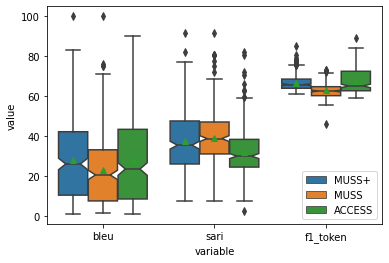

In [249]:
plt = sns.boxplot('variable', 'value', 
                  data=metmelt, hue='model',
                  notch=True, showmeans=True)
#plt.set_title("Automatic Metric Scores (based on n-grams)")
plt.legend( loc='lower right')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


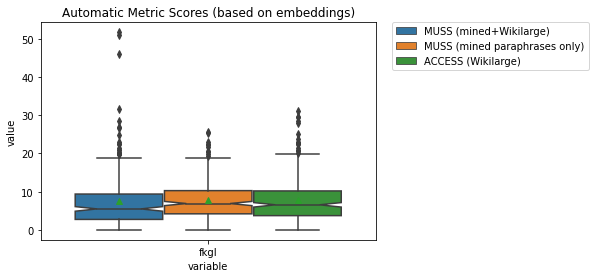

In [155]:
plt = sns.boxplot('variable', 'value', 
                  data=metmelt, hue='model',
                  notch=True, showmeans=True)
plt.set_title("Automatic Metric Scores (based on embeddings)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'simplified_access'),
 Text(0, 0, 'simplified_muss_en_mined'),
 Text(0, 0, 'simplified_muss_en_wikilarge_mined')]

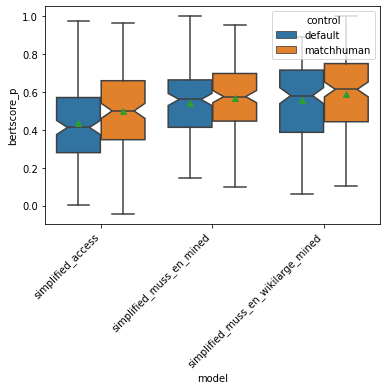

In [156]:
plt = sns.boxplot('model', 'bertscore_p', 
                  data=mets, hue='control',
                  notch=True, showmeans=True,
                  order=sorted(mets['model'].unique()))
plt.set_xticklabels(plt.get_xticklabels(), 
                    rotation=45, 
                    horizontalalignment='right')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'simplified_access'),
 Text(0, 0, 'simplified_muss_en_mined'),
 Text(0, 0, 'simplified_muss_en_wikilarge_mined')]

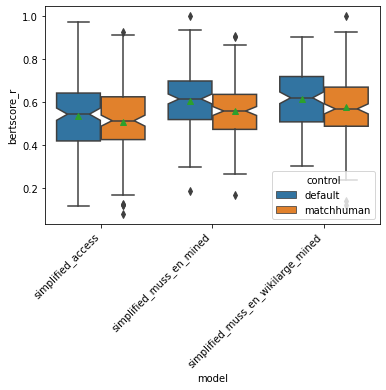

In [157]:
plt = sns.boxplot('model', 'bertscore_r', 
                  data=mets, hue='control',
                  notch=True, showmeans=True,
                  order=sorted(mets['model'].unique()))
plt.set_xticklabels(plt.get_xticklabels(), 
                    rotation=45, 
                    horizontalalignment='right')

[Text(0, 0, 'simplified_access'),
 Text(0, 0, 'simplified_muss_en_mined'),
 Text(0, 0, 'simplified_muss_en_wikilarge_mined')]

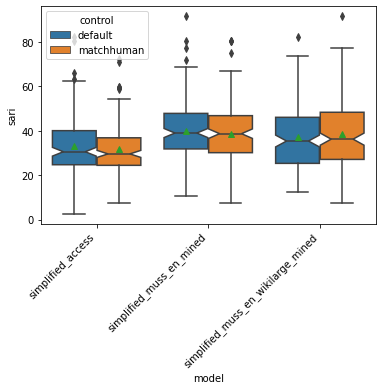

In [158]:
plt = sns.boxplot(x='model', y='sari', 
                  data=mets, hue='control',
                  notch=True, showmeans=True,
                  order=sorted(mets['model'].unique()))
plt.set_xticklabels(plt.get_xticklabels(), 
                    rotation=45, 
                    horizontalalignment='right')

[Text(0, 0, 'simplified_access'),
 Text(0, 0, 'simplified_muss_en_mined'),
 Text(0, 0, 'simplified_muss_en_wikilarge_mined')]

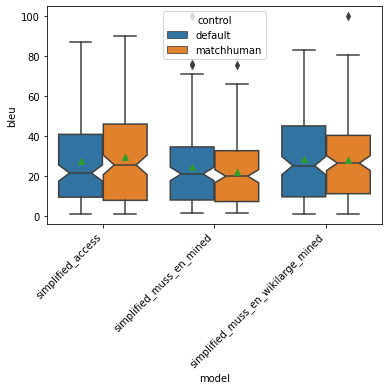

In [159]:
plt = sns.boxplot(x='model', y='bleu', 
                  data=mets, hue='control',
                  notch=True, showmeans=True,
                  order=sorted(mets['model'].unique()))
plt.set_xticklabels(plt.get_xticklabels(), 
                    rotation=45, 
                    horizontalalignment='right')

In [160]:
mets_df_merged

,sent_id,sentence,model,bleu,sari,fkgl,bertscore_p,bertscore_r,bertscore_f,f1_token,...,lev_sim,exact,adds,dels,lex_comp,complex,simplified,Grammaticality,Simplicity,Adequacy
0,5,"By the end of eleven years, however, Mrs. Pric...",simplified_muss_en_wikilarge_mined_default,63.257,25.868,11.225,0.837757,0.806847,0.822549,74.783,...,0.840,False,0.212,0.212,8.226,"By the end of eleven years, however, Mrs. Pric...","By the end of eleven years, however, Mrs. Pric...",3.0,3.0,4.0
1,14,In the evening the same room was more stifling...,simplified_muss_en_wikilarge_mined_default,33.754,17.259,4.420,0.601398,0.417541,0.508713,74.830,...,0.697,False,0.265,0.382,9.126,In the evening the same room was more stifling...,In the evening the same room was more stifling...,4.0,1.0,2.0
2,16,"Believe me, good folks, this is not so inconsi...",simplified_muss_en_wikilarge_mined_default,35.280,18.220,3.534,0.827683,0.683619,0.755134,74.669,...,0.744,False,0.143,0.333,7.772,"Believe me, good folks, this is not so inconsi...","Believe me, good people, this is not so insign...",4.0,2.0,4.0
3,19,"I maintain this to be a dedication, notwithsta...",simplified_muss_en_wikilarge_mined_default,49.380,22.354,9.284,0.821011,0.823501,0.822545,75.841,...,0.847,False,0.217,0.217,8.770,"I maintain this to be a dedication, notwithsta...","I maintain that this is a dedication, despite ...",3.5,1.5,2.0
4,29,"Here was she disturbed and unhappy, because he...",simplified_muss_en_wikilarge_mined_default,48.740,40.812,28.419,0.561208,0.699017,0.629864,72.598,...,0.860,False,0.115,0.167,9.410,"Here was she disturbed and unhappy, because he...","Here was she disturbed and unhappy, because he...",3.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,120,"It is a melancholy object to those, who walk t...",simplified_access_default,7.108,20.652,7.551,0.148461,0.536511,0.336441,61.443,...,0.876,False,0.065,0.161,7.996,"It is a melancholy object to those, who walk t...","It is a melancholy object to those, who walk t...",4.0,1.0,2.0
176,125,There only remain a hundred and twenty thousan...,simplified_access_default,39.181,42.523,8.353,0.844872,0.820959,0.833162,61.240,...,0.902,False,0.133,0.133,7.872,There only remain a hundred and twenty thousan...,There only remain a hundred and twenty thousan...,3.5,2.5,3.5
177,131,"At friendly meetings, and when the wine was to...",simplified_access_default,1.433,19.605,9.362,0.125119,0.354616,0.238567,60.524,...,0.879,False,0.103,0.172,8.183,"At friendly meetings, and when the wine was to...","At friendly meetings, and when the wine was to...",2.0,2.0,2.0
178,141,"So, I called myself Pip, and came to be called...",simplified_access_default,22.719,41.117,0.827,0.382223,0.318165,0.351054,59.592,...,0.826,False,0.286,0.286,4.913,"So, I called myself Pip, and came to be called...","So, he called the myself Pip, and it was calle...",0.0,0.0,0.0


In [161]:
mets_df.groupby('model')[['bleu', 'sari', 'fkgl',
                          'bertscore_p', 'bertscore_r', 'bertscore_f'
                          ]].describe()

bleu              \
                                                    count        mean   
model                                                                   
simplified_access_default                           150.0   27.870527   
simplified_access_match_human_params                150.0   29.550633   
simplified_human                                    150.0  100.000000   
simplified_muss_en_mined_default                    150.0   24.677673   
simplified_muss_en_mined_match_human_params         150.0   22.079440   
simplified_muss_en_wikilarge_mined_default          150.0   28.697593   
simplified_muss_en_wikilarge_mined_match_human_...  150.0   28.033840   

                                                                        \
                                                          std      min   
model                                                                    
simplified_access_default                           21.618790    1.340   
simplified_access_match_human_params                21.757502    1.422   
simplified_human                                     0.000000  100.000   
simplified_muss_en_mined_default                    18.397399    1.486   
simplified_muss_en_mined_match_human_params         15.885087    1.656   
simplified_muss_en_wikilarge_mined_default          20.747450    1.316   
simplified_muss_en_wikilarge_mined_match_human_...  19.661874    1.214   

                                                                         \
                                                          25%       50%   
model                                                                     
simplified_access_default                             9.60075   21.6315   
simplified_access_match_human_params                  8.00725   25.7075   
simplified_human                                    100.00000  100.0000   
simplified_muss_en_mined_default                      8.17475   21.1925   
simplified_muss_en_mined_match_human_params           7.38700   20.0580   
simplified_muss_en_wikilarge_mined_default            9.76650   25.3280   
simplified_muss_en_wikilarge_mined_match_human_...   11.32275   26.6075   

                                                                         sari  \
                                                          75%      max  count   
model                                                                           
simplified_access_default                            40.97550   87.159  150.0   
simplified_access_match_human_params                 46.10175   90.000  150.0   
simplified_human                                    100.00000  100.000  150.0   
simplified_muss_en_mined_default                     34.69275  100.000  150.0   
simplified_muss_en_mined_match_human_params          32.81700   75.392  150.0   
simplified_muss_en_wikilarge_mined_default           45.19125   83.172  150.0   
simplified_muss_en_wikilarge_mined_match_human_...   40.46675  100.000  150.0   

                                                               ...  \
                                                         mean  ...   
model                                                          ...   
simplified_access_default                           33.015953  ...   
simplified_access_match_human_params                31.869513  ...   
simplified_human                                    85.333307  ...   
simplified_muss_en_mined_default                    39.835613  ...   
simplified_muss_en_mined_match_human_params         38.517640  ...   
simplified_muss_en_wikilarge_mined_default          37.108600  ...   
simplified_muss_en_wikilarge_mined_match_human_...  38.461660  ...   

                                                   bertscore_r            \
                                                           75%       max   
model                                                                      
simplified_access_default                             0.643083  0.974908   
simplified_acc

In [206]:
mets_df_merged.rename(columns={'Grammaticality':'Fluency'}, inplace=True)

In [238]:
mets_df_merged.groupby('model').mean().corr()[['Fluency', 'Simplicity', 'Adequacy']]

,Fluency,Simplicity,Adequacy
sent_id,NaN,NaN,NaN
bleu,0.061565,0.065296,0.080680
sari,0.893494,0.750263,0.877414
fkgl,0.333924,-0.161073,0.489872
bertscore_p,0.944858,0.952535,0.835388
bertscore_r,0.900819,0.581838,0.971015
bertscore_f,0.982308,0.835778,0.951115
f1_token,-0.458617,-0.463586,-0.413773
cos_sim,0.847324,0.608316,0.913918
comp_ratio,-0.463272,-0.812891,-0.211245


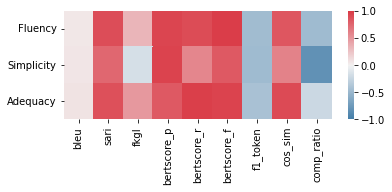

In [207]:
mean_corr = mets_df_merged.groupby('model').mean().corr()[['Fluency', 'Simplicity', 'Adequacy']][1:10].T
fig, ax = plt.subplots(figsize=(6,2))
sns.heatmap(mean_corr, vmin=-1, vmax=1, cmap=cmap, ax=ax)

In [208]:
mets_df_merged.corr()

,sent_id,bleu,sari,fkgl,bertscore_p,bertscore_r,bertscore_f,f1_token,cos_sim,comp_ratio,sent_split,lev_sim,exact,adds,dels,lex_comp,Fluency,Simplicity,Adequacy
sent_id,1.000000,-0.263308,0.212305,0.033453,-0.193698,-0.087812,-0.159868,-0.773878,-0.048599,-0.046034,-0.027996,0.066062,0.005338,-0.161153,-0.026784,-0.378671,0.001712,0.000541,-0.041117
bleu,-0.263308,1.000000,0.389314,-0.244037,0.739002,0.614306,0.729258,0.317434,0.458705,0.068811,0.008774,0.154303,-0.009027,-0.031633,-0.192633,0.058789,0.051430,0.113211,0.071397
sari,0.212305,0.389314,1.000000,-0.168411,0.354374,0.483757,0.432598,-0.284585,0.450091,-0.129667,0.139024,-0.267183,-0.097492,0.218845,0.278969,-0.079522,0.115938,0.333511,0.194299
fkgl,0.033453,-0.244037,-0.168411,1.000000,-0.501981,-0.335736,-0.460134,-0.003073,-0.063343,-0.189364,-0.308263,0.149552,-0.067432,-0.335162,-0.109797,0.311940,-0.077271,-0.169709,0.037983
bertscore_p,-0.193698,0.739002,0.354374,-0.501981,1.000000,0.773251,0.961708,0.132036,0.443563,-0.026371,-0.042387,-0.027575,0.111413,0.093056,0.023589,-0.065982,0.307373,0.331736,0.269911
bertscore_r,-0.087812,0.614306,0.483757,-0.335736,0.773251,1.000000,0.917388,0.026561,0.366483,0.123596,-0.037648,0.057160,0.129699,0.070646,-0.177788,-0.023413,0.353569,0.230476,0.466331
bertscore_f,-0.159868,0.729258,0.432598,-0.460134,0.961708,0.917388,1.000000,0.094189,0.437129,0.037615,-0.042001,0.007816,0.126301,0.089499,-0.062629,-0.051592,0.344950,0.307567,0.371091
f1_token,-0.773878,0.317434,-0.284585,-0.003073,0.132036,0.026561,0.094189,1.000000,-0.043659,0.114057,0.056937,0.139479,-0.016086,0.035157,-0.153254,0.318626,-0.152634,-0.134037,-0.096867
cos_sim,-0.048599,0.458705,0.450091,-0.063343,0.443563,0.366483,0.437129,-0.043659,1.000000,-0.099395,0.188703,0.014071,0.020773,-0.033498,0.025569,0.113754,0.044294,0.228032,0.146728
comp_ratio,-0.046034,0.068811,-0.129667,-0.189364,-0.026371,0.123596,0.037615,0.114057,-0.099395,1.000000,-0.035489,0.266130,0.104453,0.435002,-0.509740,-0.245521,-0.173605,-0.506911,-0.053581


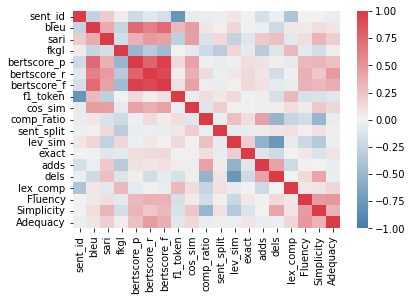

In [209]:
cmap=sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(mets_df_merged.corr(), vmin=-1, vmax=1, cmap=cmap)

Illustrate correlations between annotations and all metrics:

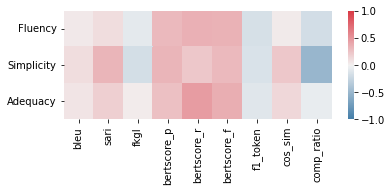

In [210]:
import matplotlib.pyplot as plt

sent_corr = mets_df_merged.corr()[['Fluency', 'Simplicity', 'Adequacy']][1:10].T

fig, ax = plt.subplots(figsize=(6, 2))
sns.heatmap(sent_corr, vmin=-1, vmax=1, cmap=cmap, ax=ax)